In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file = '/content/drive/My Drive/Colab Notebooks/미래에셋/train.csv'
df = pd.read_csv(file)

In [6]:
df

,ID,nur_hosp_yn,ac_ctr_diff,hsp_avg_optt_bilg_isamt_s,hsp_avg_surop_bilg_isamt_s,ar_rclss_cd,fds_cust_yn,hspz_dys_s,inamt_nvcd,hsp_avg_diag_bilg_isamt_s,blrs_cd,dsas_ltwt_gcd,dsas_avg_diag_bilg_isamt_s,dsas_acd_rst_dcd,base_ym,kcd_gcd,hsp_avg_hspz_bilg_isamt_s,optt_blcnt_s,mtad_cntr_yn,heltp_pf_ntyn,prm_nvcd,surop_blcnt_s,mdct_inu_rclss_dcd,dsas_avg_optt_bilg_isamt_s,isrd_age_dcd,hspz_blcnt_s,dsas_avg_surop_bilg_isamt_s,urlb_fc_yn,dsas_avg_hspz_bilg_isamt_s,smrtg_5y_passed_yn,ac_rst_diff,bilg_isamt_s,optt_nbtm_s,target
0,0,0,6,0.1303,0.0000,1,0,0.3452,4,0.0000,12,1,0.9793,1,201901,3,1.6021,2.0,0,0,1,0.0000,2,1.2002,3,10.0000,1.1701,0,1.2612,0,0,0.4240,0.8571,1
1,1,1,6,0.0000,0.5770,4,0,0.0000,4,0.0000,2,3,0.0000,22,201901,8,0.0000,0.0,0,0,1,1.0000,1,0.0000,4,0.0000,0.1508,0,0.0023,0,0,0.8602,0.0000,0
2,2,1,6,0.0000,0.2885,1,1,0.0000,6,0.0000,2,3,0.0000,22,201901,8,0.0000,0.0,0,0,1,1.0000,1,0.0000,4,0.0000,0.1508,0,0.0023,0,0,0.4301,0.0000,1
3,3,0,4,0.0197,0.0680,2,0,0.8056,6,0.0587,8,3,0.0000,23,201901,8,0.5638,0.0,0,0,1,0.0000,2,0.0000,9,1.4444,0.0863,0,0.1920,0,0,0.2509,0.0000,1
4,4,0,5,0.0000,0.0000,9,0,0.4167,2,0.0000,8,3,0.0000,23,201901,8,0.4464,0.0,0,0,2,0.0000,2,0.0000,0,1.3333,0.0863,0,0.1920,0,0,0.0323,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377923,377923,0,6,0.7997,1.0588,1,0,0.1454,2,1.2320,11,1,1.1093,1,201911,3,0.4626,0.0,0,0,1,1.0000,2,1.1610,3,1.3242,1.2955,0,1.1660,0,0,9.5518,0.0000,2
377924,377924,0,0,2.3047,1.2993,9,0,1.7434,99,0.5585,9,1,1.0761,1,201904,3,0.7844,0.0,0,0,99,0.7896,2,1.2228,7,6.6667,1.1811,0,1.0199,0,6,0.0000,0.0000,2
377925,377925,1,0,0.0000,0.0000,9,0,22.6866,99,0.0000,8,1,0.8417,6,201907,9,10.6758,0.0,0,0,99,0.0000,2,0.0000,7,0.7234,1.0221,0,1.5595,0,0,0.0000,0.0000,2
377926,377926,0,6,1.3784,1.4096,4,0,0.0832,1,0.8812,10,1,1.1036,1,201909,3,0.6908,0.0,0,0,1,1.0000,3,1.2499,3,0.6667,1.2766,0,1.2040,0,0,2.7239,0.0000,2


연속형 변수

hsp_avg_optt_bilg_isamt_s : 병원별평균통원청구보험금

hsp_avg_surop_bilg_isamt_s : 

범주형 변수

nur_hosp_yn : 요양병원 여부

ac_ctr_diff : 청구일계약일간기간구분코드



In [9]:
# 변수 중 id는 식별코드이므로 필요없음. 삭제

df = df.drop(['ID'], axis=1)

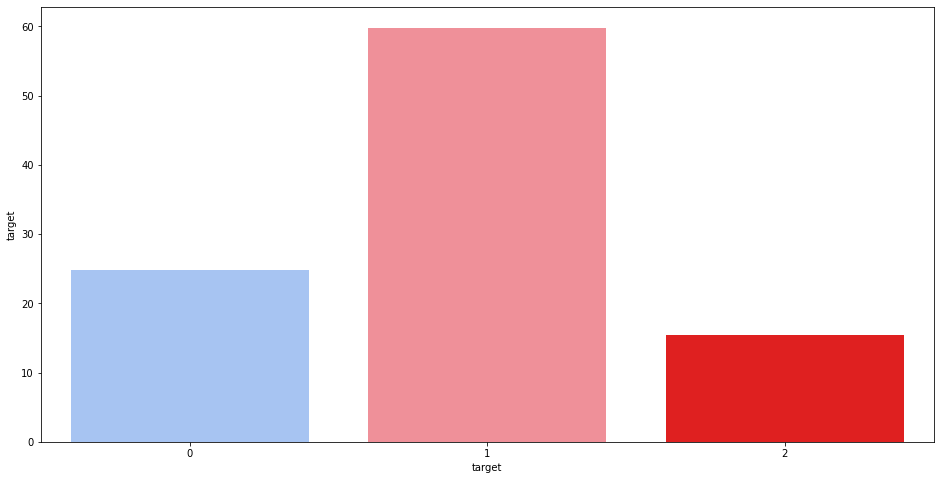

In [7]:
# 대출 상환 True(불이행), False(이행) 갯수 확인
fig, ax = plt.subplots(1,1, figsize=(16,8))
colors = ["#9ac1ff", "#ff808c"]
labels ="0", "1", "2"
palette = ["#9ac1ff", "#ff808c", "red"]
sns.barplot(x="target", y="target", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)


대출 이행 비율이 1.5 : 3 : 1 로 불균형 데이터 > 추후, 샘플링 과정 필요할 것으로 예상

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377928 entries, 0 to 377927
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nur_hosp_yn                  377928 non-null  int64  
 1   ac_ctr_diff                  377928 non-null  int64  
 2   hsp_avg_optt_bilg_isamt_s    377928 non-null  float64
 3   hsp_avg_surop_bilg_isamt_s   377928 non-null  float64
 4   ar_rclss_cd                  377928 non-null  int64  
 5   fds_cust_yn                  377928 non-null  int64  
 6   hspz_dys_s                   377928 non-null  float64
 7   inamt_nvcd                   377928 non-null  int64  
 8   hsp_avg_diag_bilg_isamt_s    377928 non-null  float64
 9   blrs_cd                      377928 non-null  int64  
 10  dsas_ltwt_gcd                377928 non-null  int64  
 11  dsas_avg_diag_bilg_isamt_s   377928 non-null  float64
 12  dsas_acd_rst_dcd             377928 non-null  int64  
 13 

In [35]:
# 타겟별 연속형 변수 분포 확인
def con_ins_plot(df, x):
  fig, ax = plt.subplots(1, 1, figsize=(16,5))
  ins_value = df[x].values
  sns.distplot(ins_value, ax=ax, color='green')
  ax.set_title(f'{x} plot', fontsize=20)
  plt.show()

# boxplot
def con_ins_boxplot(df, x):
  fig, ax = plt.subplots(1, 1, figsize=(16,5))
  sns.boxplot(df[x].values, ax = ax, color='#ffdfba')

# 연속형변수 타겟별 분포
def continuous_TF_plot(df, x_var):
    df_0 = df[df['target']==0]
    df_1 = df[df['target']==1]
    df_2 = df[df['target']==2]


    fig, ax = plt.subplots(1, 2, figsize=(16,5))
    x_0 = df_0[x_var].values
    x_1 = df_1[x_var].values
    x_2 = df_2[x_var].values

    sns.distplot(x_0, ax=ax[0], color='#ffffba')
    sns.distplot(x_1, ax=ax[0], color='#ffb3ba')
    sns.distplot(x_2, ax=ax[0], color='#baffc9')

    palette = ["#ffffba", "#ffb3ba", '#baffc9']
    sns.boxplot(x = "target", y=x_var, ax = ax[1], palette=palette, data = df)
    plt.show()

In [21]:
# 타겟별 범주형 분포 확인
def bar_ins_stack(df, x, a=0):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ins_by_x = df.groupby([x, 'target']).size()
    ins_by_x_t = ins_by_x / ins_by_x.groupby(level=0).sum()
    ins_by_x_ratio = ins_by_x_t.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    

    cmap = plt.cm.Set3

    ins_by_x.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax[0], grid=False)
    ax[0].set_title(f'Target by {x}', fontsize=20)

    ins_by_x_ratio.unstack().plot(kind='bar', stacked=False, colormap=cmap, ax=ax[1], grid=False)
    ax[1].set_title(f'Target by {x} Ratio', fontsize=20)
    if a != 0:
        for i in ax[1].patches:
            ax[1].text(i.get_x()+.02, i.get_height()/2, str(round((i.get_height()), 2)), fontsize=11, color='black')


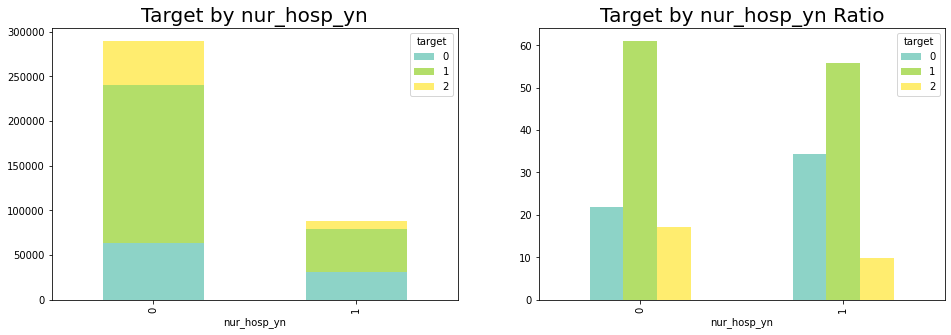

In [15]:
# 요양병원여부 

bar_ins_stack(df, 'nur_hosp_yn')

1. 요양병원에 살았을 때 자동지급의 비율이 조금 더 올라가는 모습을 보임.
2. 심사 비율은 비슷하지만 조사비율이 전부 자동지급으로 간듯?

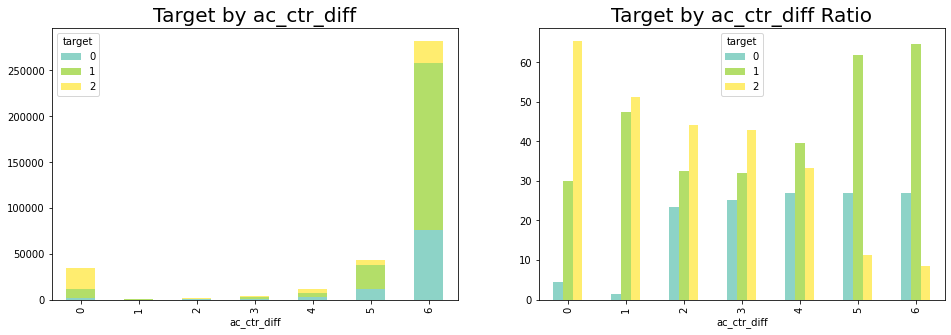

In [20]:
# 청구일계약기간 구분코드

bar_ins_stack(df, 'ac_ctr_diff')

1. 6이 압도적으로 많아서.. 잘 모르겠다 일단은
2. 2년 이하까지는 심사 비율이 많이 높음.
3. 2년 초과부터는 비율이 비슷함.

4이하/초과로 나누어 코딩하는 방법이 있을듯

그렇게 해버리면 280000:50000 이렇게 되버려서 .. 이게 맞나 싶거든 사실?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


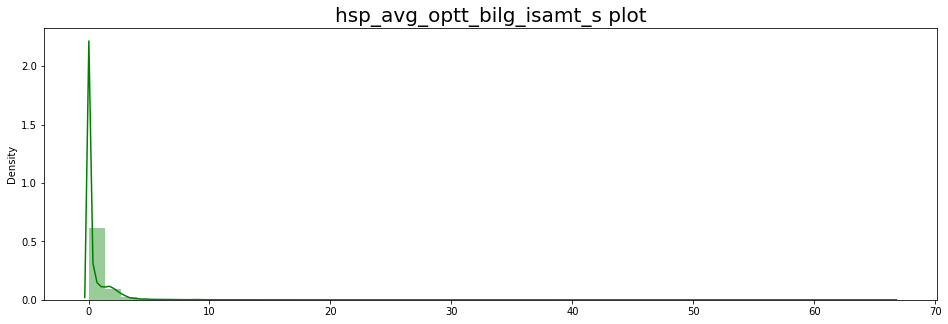

In [24]:
# hsp_avg_optt_bilg_isamt_s 병원별 평ㅇ균 통원 청구 보험금

con_ins_plot(df, 'hsp_avg_optt_bilg_isamt_s')

편차가 커 보여서 조정필요.

In [26]:
df["hsp_avg_optt_bilg_isamt_s"].describe()

count    377928.000000
mean          0.617748
std           1.353445
min           0.000000
25%           0.000000
50%           0.041700
75%           0.712400
max          66.486500
Name: hsp_avg_optt_bilg_isamt_s, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


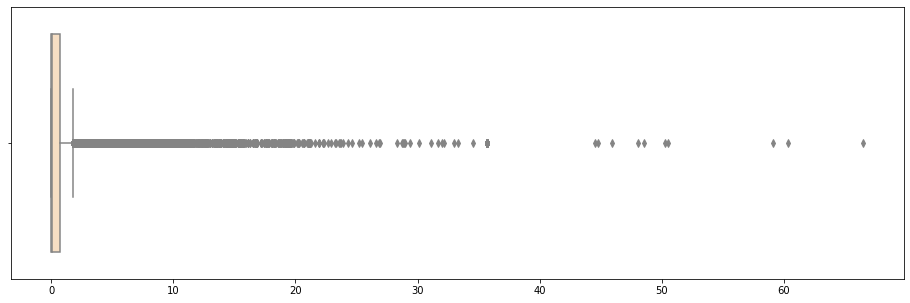

In [29]:
con_ins_boxplot(df, 'hsp_avg_optt_bilg_isamt_s')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

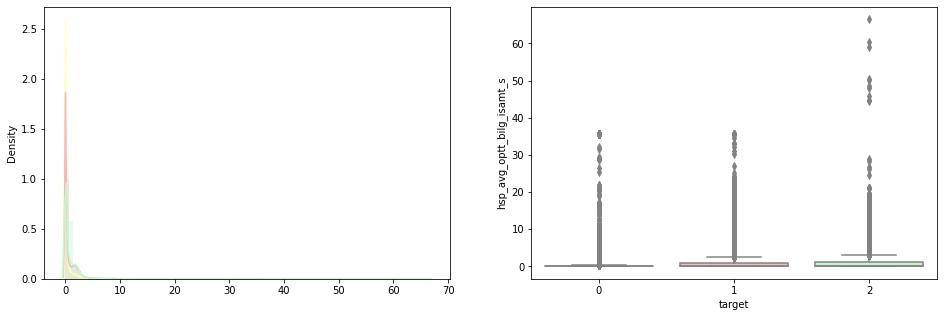

In [36]:
continuous_TF_plot(df, 'hsp_avg_optt_bilg_isamt_s')

3 이상이 15000개

4 이상이 4500개

5 이상이 1500개
--> 일단 3개 다 해볼까..

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


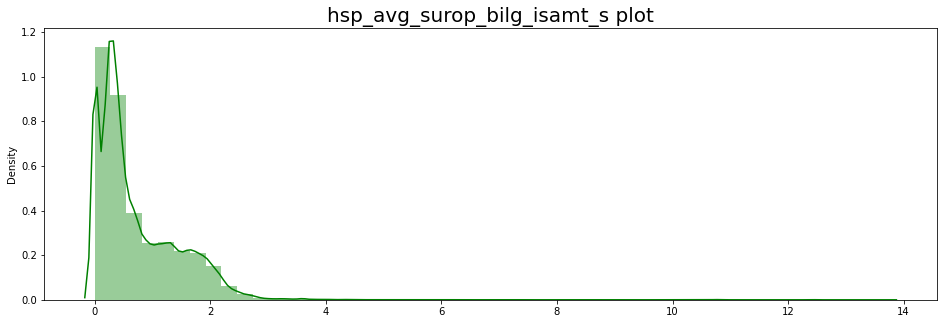

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

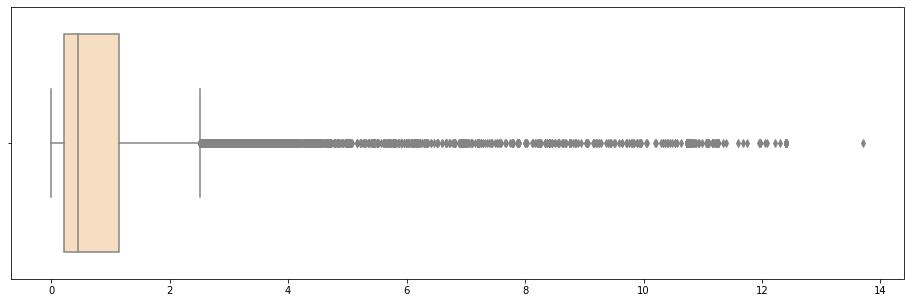

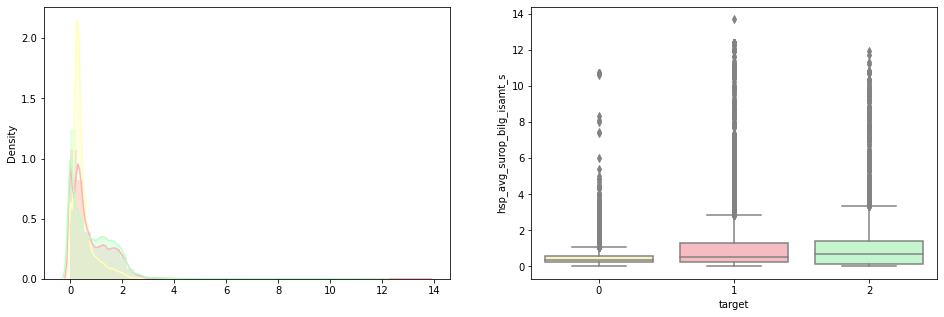

In [42]:
# hsp_avg_surop_bilg_isamt_s 병원별 평균 수술 청구 보험금

con_ins_plot(df, 'hsp_avg_surop_bilg_isamt_s')
con_ins_boxplot(df, 'hsp_avg_surop_bilg_isamt_s')
continuous_TF_plot(df, 'hsp_avg_surop_bilg_isamt_s')

In [45]:
# df['hsp_avg_surop_bilg_isamt_s'].describe()
df[df['hsp_avg_surop_bilg_isamt_s'] >= 3]

,nur_hosp_yn,ac_ctr_diff,hsp_avg_optt_bilg_isamt_s,hsp_avg_surop_bilg_isamt_s,ar_rclss_cd,fds_cust_yn,hspz_dys_s,inamt_nvcd,hsp_avg_diag_bilg_isamt_s,blrs_cd,dsas_ltwt_gcd,dsas_avg_diag_bilg_isamt_s,dsas_acd_rst_dcd,base_ym,kcd_gcd,hsp_avg_hspz_bilg_isamt_s,optt_blcnt_s,mtad_cntr_yn,heltp_pf_ntyn,prm_nvcd,surop_blcnt_s,mdct_inu_rclss_dcd,dsas_avg_optt_bilg_isamt_s,isrd_age_dcd,hspz_blcnt_s,dsas_avg_surop_bilg_isamt_s,urlb_fc_yn,dsas_avg_hspz_bilg_isamt_s,smrtg_5y_passed_yn,ac_rst_diff,bilg_isamt_s,optt_nbtm_s,target
138,0,6,0.0000,3.2457,5,1,0.0833,2,0.0000,10,2,0.0000,10,201901,5,0.0000,0.0,0,0,1,1.0000,2,0.0000,4,0.6667,0.5966,0,0.6341,0,0,1.6129,0.0,1
490,0,6,0.0676,3.6939,4,0,0.2222,2,1.4197,11,1,0.9572,5,201901,9,0.3449,0.0,0,0,1,2.0000,2,0.2679,4,0.6667,1.1850,0,0.6279,0,6,7.2115,0.0,1
560,0,6,0.0676,3.6063,3,0,0.2500,2,0.0000,10,1,0.9572,5,201901,9,0.5693,0.0,0,0,1,1.0000,2,0.2679,5,0.6667,1.1850,1,0.6279,0,0,2.7151,0.0,1
871,1,6,4.7297,5.0489,3,1,5.2500,2,0.0000,8,1,0.9793,1,201901,3,5.2427,0.0,0,0,1,0.0000,2,1.2002,2,1.3333,1.1701,0,1.2612,0,0,1.0215,0.0,1
1105,0,6,0.0676,3.6939,4,0,1.5000,6,1.4197,8,2,2.9489,8,201901,11,0.3449,0.0,0,0,3,0.0000,2,0.0000,5,1.3333,0.9824,0,0.9155,0,0,0.3011,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377465,1,0,0.0000,3.7105,9,0,0.2247,99,0.7450,11,1,0.9819,1,201901,3,0.4482,0.0,0,0,99,1.0000,1,1.1959,7,0.6813,1.1702,0,1.2601,0,0,0.0000,0.0,2
377527,0,6,0.0903,4.4225,9,0,1.0520,2,0.4370,9,1,0.5167,3,201902,5,2.2101,0.0,0,0,1,0.6683,2,0.6213,4,0.6667,0.7827,0,0.8281,0,0,0.6619,0.0,2
377633,0,6,0.5673,3.1870,3,0,45.1719,1,0.9161,8,1,0.9022,6,201905,9,2.0953,0.0,0,0,1,0.0000,2,0.0000,5,0.6667,1.4609,0,1.8886,0,0,3.3871,0.0,2
377811,0,6,0.1411,3.8517,1,0,2.1449,2,0.3062,8,3,0.0000,16,201904,5,2.0892,0.0,0,0,1,0.0000,2,0.0000,3,1.8260,0.5767,0,0.9074,0,0,1.1192,0.0,2


자동은 수술 금액이 낮은거 같음.

일단 처리를 어떤식으로 할지 봐야할듯..

3이상이 약 2100개

2이상이 약 22000개

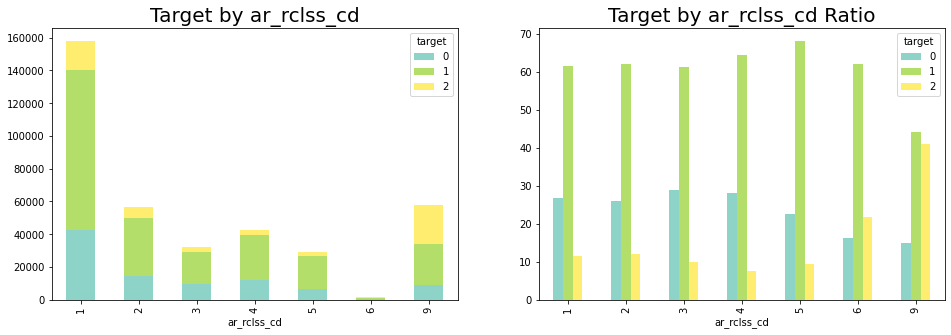

In [47]:
# ar_rclss_cd 발생지역구분코드
bar_ins_stack(df, 'ar_rclss_cd')

## 6이 들어가있는데. 오류라고 함.

9 제주도나 기타인 경우 조사비율이 많이 높음

나머지는 비슷한걸로 보았을 때 9/나머지로 코딩하면 좋을거같기도함.

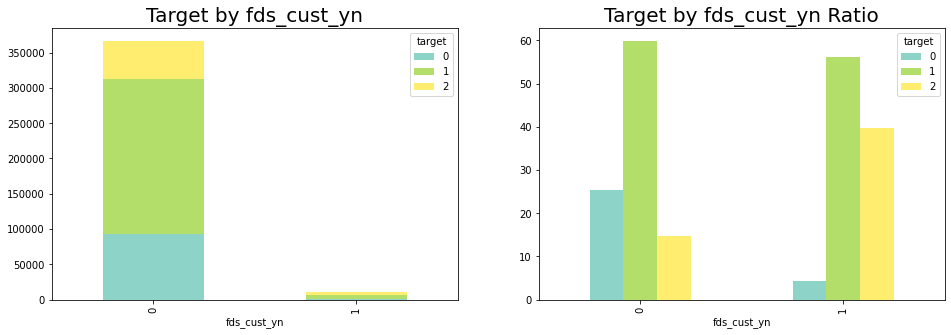

In [49]:
# fds_cust_yn   보험사기이력고객여부
bar_ins_stack(df, 'fds_cust_yn')

사기이력 고객이 압도적으로 적어서 뭐.. 변수에 영향을 줄지 의문임.
비율자체는 사기이력이 있는 고객의 조사 비율이 높기 때문에 쓸만한데.. 전체 99퍼가 0이라서..

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


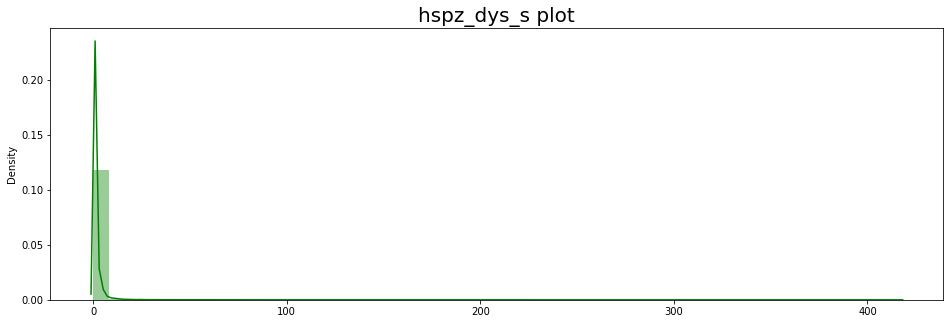

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

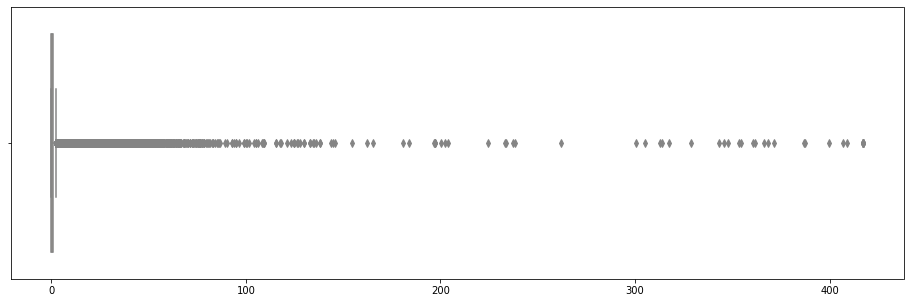

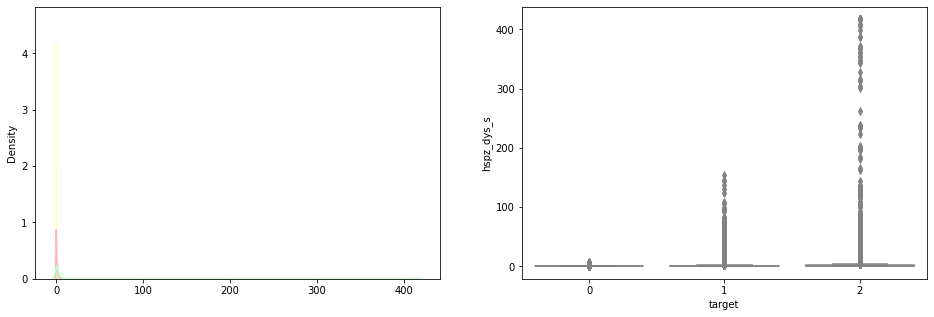

In [51]:
# hspz_dys_s 입원일수

con_ins_plot(df, 'hspz_dys_s')
con_ins_boxplot(df, 'hspz_dys_s')
continuous_TF_plot(df, 'hspz_dys_s')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


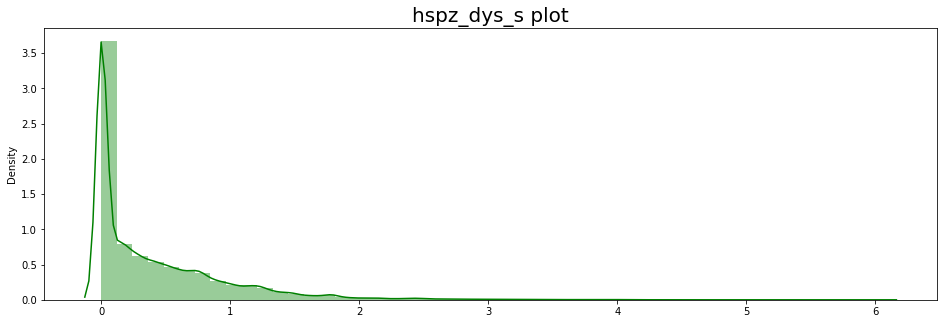

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

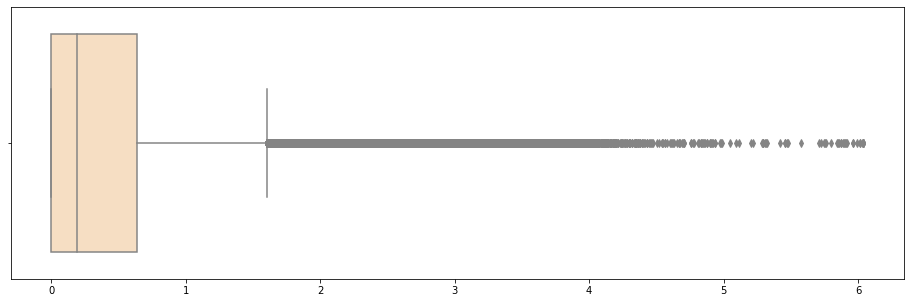

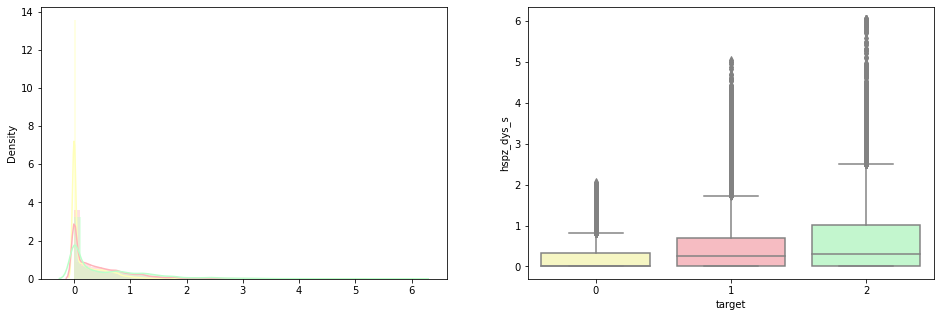

In [64]:
# hspz_dys_s 입원일수 --> 이건 너무 편차가 심할 수 밖에 없는 데이터여서.. 참

df_copy = df
df_copy['hspz_dys_s'] = np.log(df['hspz_dys_s'] + 1)
con_ins_plot(df_copy, 'hspz_dys_s')
con_ins_boxplot(df_copy, 'hspz_dys_s')
continuous_TF_plot(df_copy, 'hspz_dys_s')

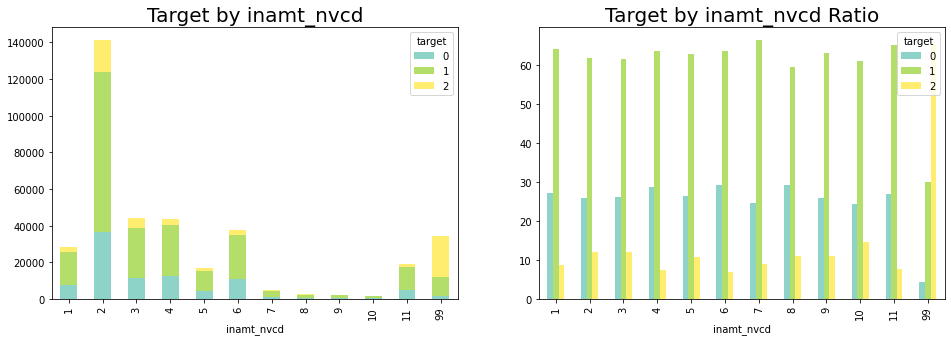

In [66]:
# inamt_nvcd 가입금액구간코드

bar_ins_stack(df, 'inamt_nvcd')

알수없는 unknown일때 조사 비율이 압도적으로 높은데 이유가 뭘까..?


unknown이 뭘 뜻하지..??? 가입금액을 모를수가있나..?????? 왜모르지//??

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


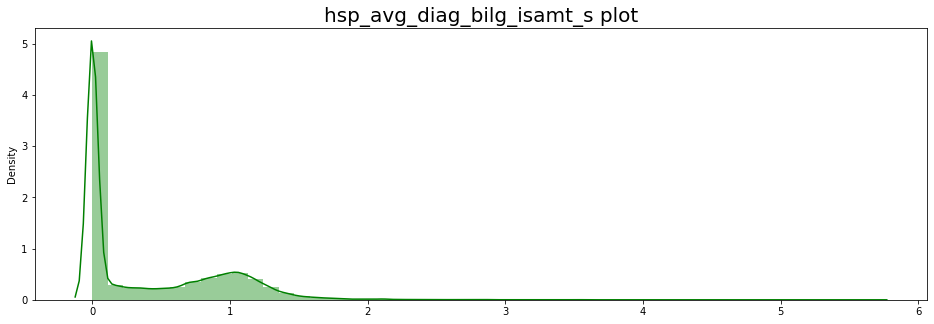

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

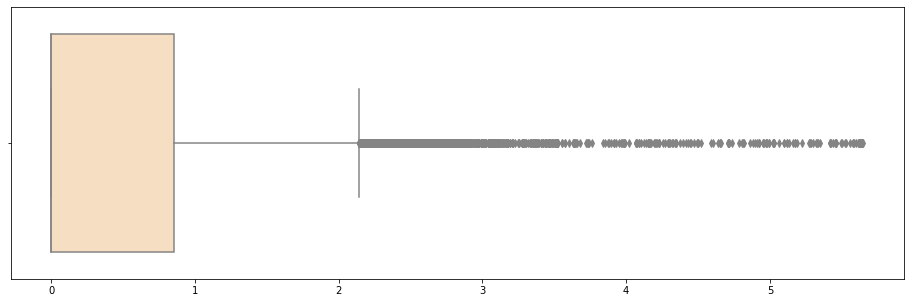

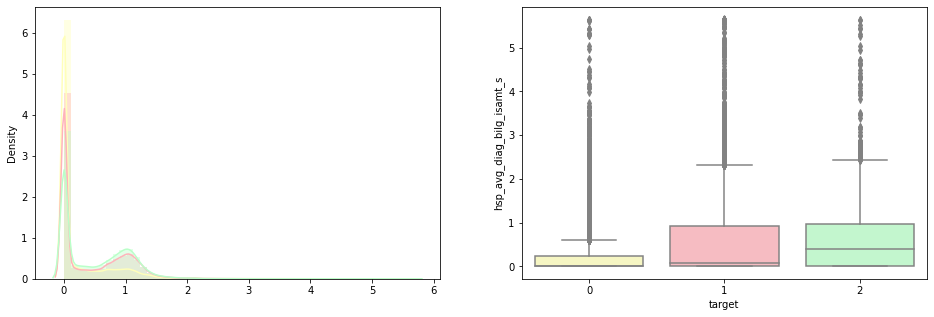

In [68]:
# hsp_avg_diag_bilg_isamt_s  병원별 평균 진단 청구 보험금

con_ins_plot(df, 'hsp_avg_diag_bilg_isamt_s')
con_ins_boxplot(df, 'hsp_avg_diag_bilg_isamt_s')
continuous_TF_plot(df, 'hsp_avg_diag_bilg_isamt_s')

이건 뭐냐... 대체..

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

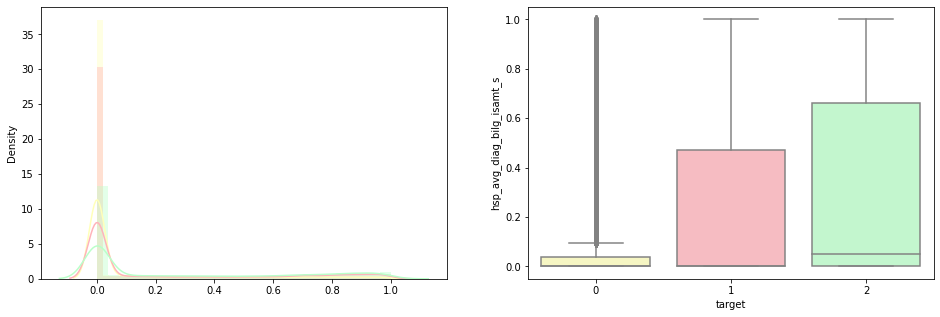

In [72]:
df['hsp_avg_diag_bilg_isamt_s'].describe()

df_copy = df[df['hsp_avg_diag_bilg_isamt_s'] < 1]
continuous_TF_plot(df_copy, 'hsp_avg_diag_bilg_isamt_s')

모르겠다.. 일단 회의때 이야기하자 지금은 그림 그리는거 충실히..

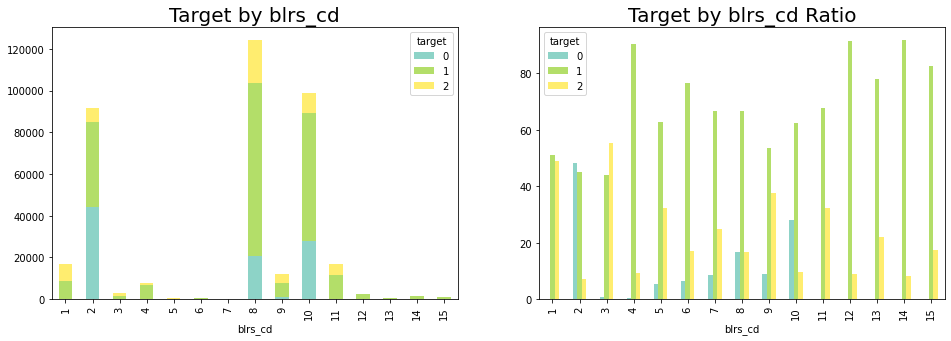

In [74]:
# blrs_cd 치료행위코드

bar_ins_stack(df, 'blrs_cd') 

오호.. 수술만한 경우는 그냥 자동 지급 비율이 엄청 높음.

입원치료는 심사 비율이 높고, 입원 및 수술치료는 자동지급비율이 좀 높네.

이거는 조정하면 엄청난 변수 될 가능성 높은듯

회의 때 30분동안 이야기 해도 안부족함.

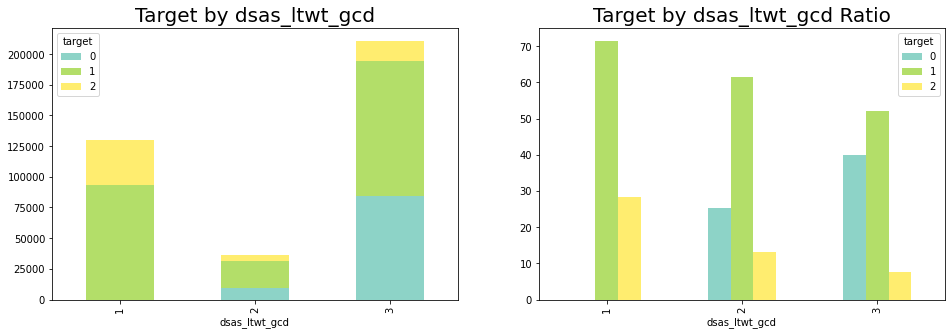

In [76]:
# dsas_ltwt_gcd 질병 경중 등급 코드 1-3

bar_ins_stack(df, 'dsas_ltwt_gcd') 

오히려 중증이 자동지급이 없네? 이건 내생각엔 청구금액이 높아서 그런듯

생활질환은 자동지급이 많은데 이것도 실비보험 그냥 통원치료 라서 그런게 아닐까 생각해봄. 

이것도.. 우째 함 조절해보자 

회의 3시간으로 안될듯

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


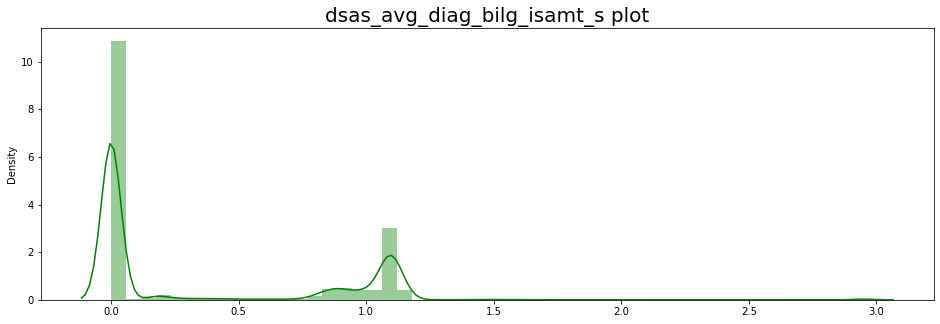

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


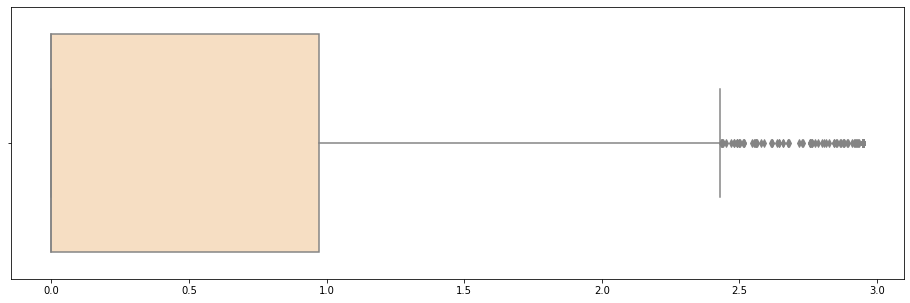

In [78]:
# dsas_avg_diag_bilg_isamt_s 질병별 평균 진단 청구 보험금

con_ins_plot(df, 'dsas_avg_diag_bilg_isamt_s')
con_ins_boxplot(df, 'dsas_avg_diag_bilg_isamt_s')


난생 태어나서 이런 그래프 첨 보네 진짜로.. 하.... 이거 뭐냐

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


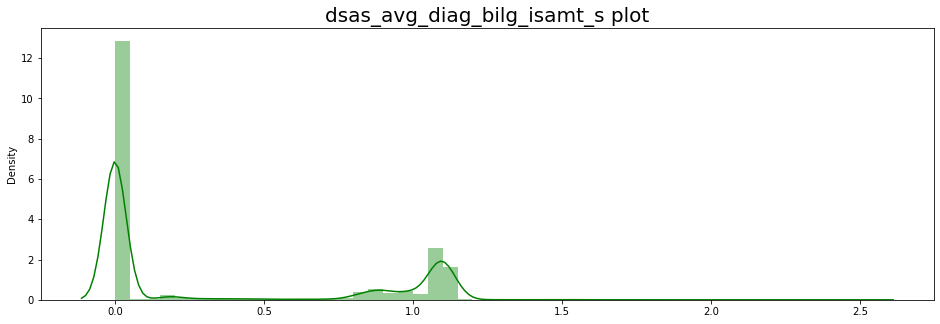

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

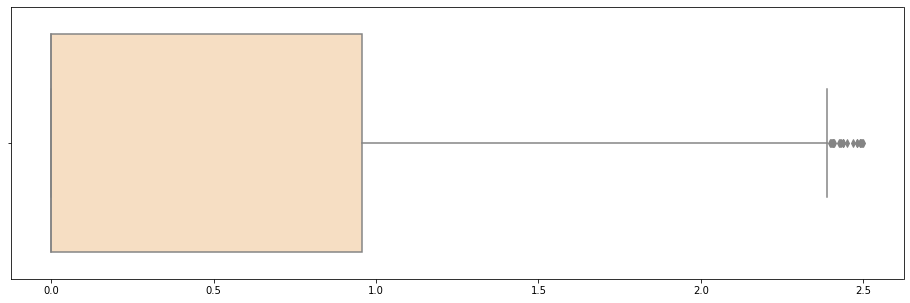

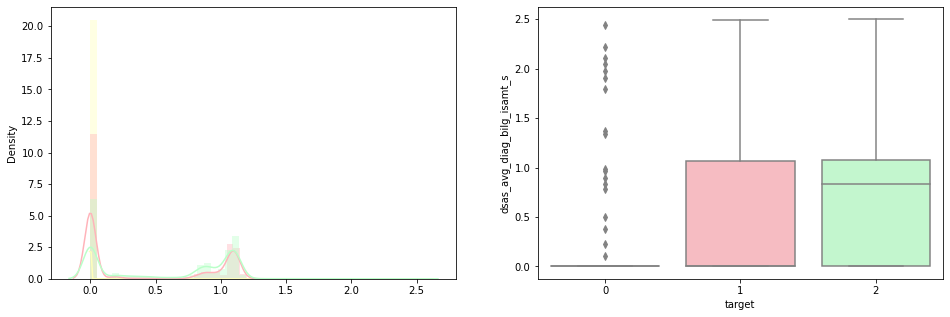

In [81]:
df_copy = df[df['dsas_avg_diag_bilg_isamt_s'] < 2.5]
con_ins_plot(df_copy, 'dsas_avg_diag_bilg_isamt_s')
con_ins_boxplot(df_copy, 'dsas_avg_diag_bilg_isamt_s')
continuous_TF_plot(df_copy, 'dsas_avg_diag_bilg_isamt_s')

유일하게 알 수 있는건 진단 청구 평균 금액이 0일 때 자동지급인 경우가 많은 듯

딴 건 우째 해야될지 감 ㄴㄴ

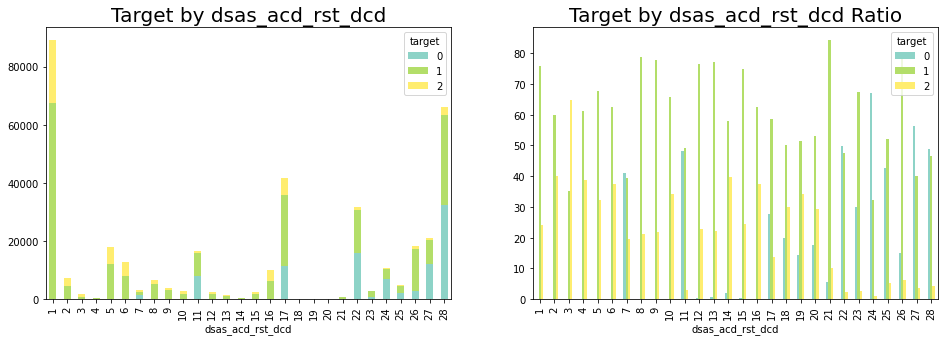

In [83]:
# dsas_acd_rst_dcd 질병 구분 코드

bar_ins_stack(df, 'dsas_acd_rst_dcd') 

너희들은 알겠냐? 난 모르겠음.. ㅋ

현재시각 새벽 3:50분

잠이 오는데 자면 ㅈ될거같음. 이거 빡세노

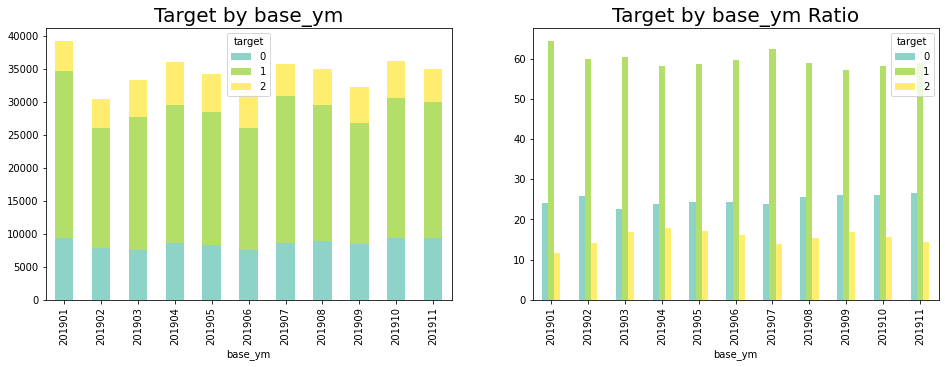

In [86]:
# base_ym 접수년월 
bar_ins_stack(df, 'base_ym') 

# 다른 변수들이랑 조합해서 여러 그래프를 그려보면 더 좋은 변수가 생성될수도있다.

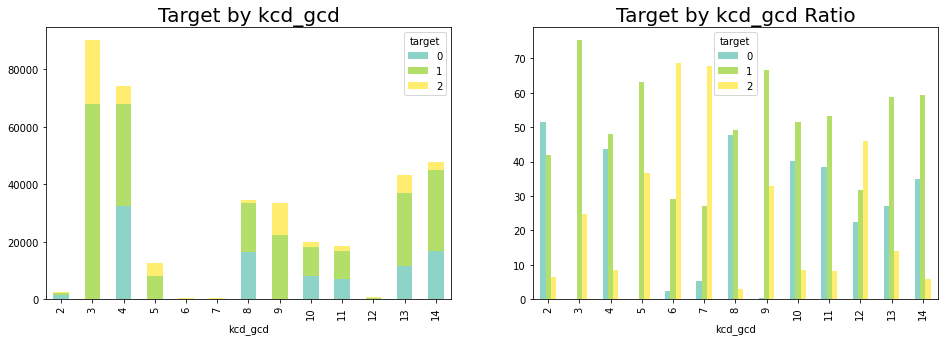

In [88]:
# kcd_gcd kdc 분류기준으로 구성된 질병정보

bar_ins_stack(df, 'kcd_gcd') 

1. 3-암 : 자동지급 x
2. 4-암말고 다른거 : 자동지급 꽤 있음
3. 8 - 눈, 귀 : 자동지급 많음
4. 9 - 순환기 질환 : 자동지급 x
5. 나머지는 비율 비슷비슷?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


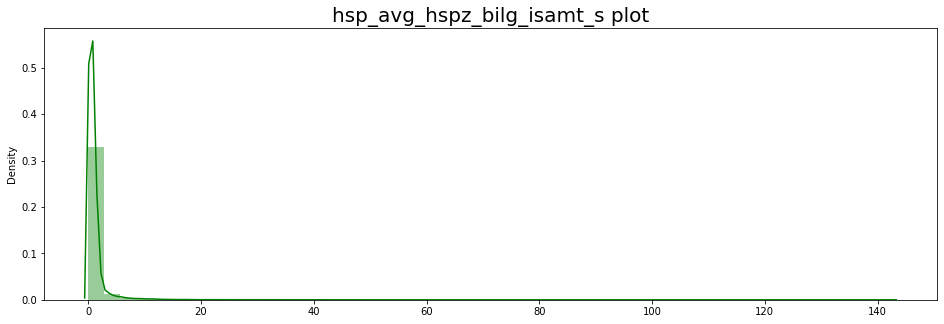

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


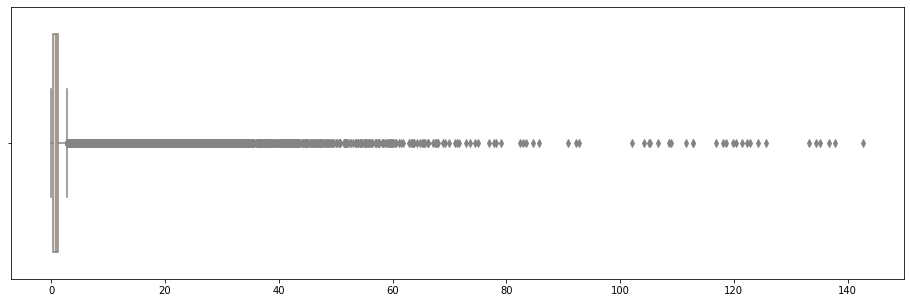

In [90]:
# hsp_avg_hspz_bilg_isamt_s 병원별 평균 입원 청구 보험금

con_ins_plot(df, 'hsp_avg_hspz_bilg_isamt_s')
con_ins_boxplot(df, 'hsp_avg_hspz_bilg_isamt_s')


이거 그냥 치료행위에 따라서 나눠야 분석 가능한건가.. 개애반데

진짜 모르겠다.. 0존나많네;;

가설을 먼저 세워야 되나..

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


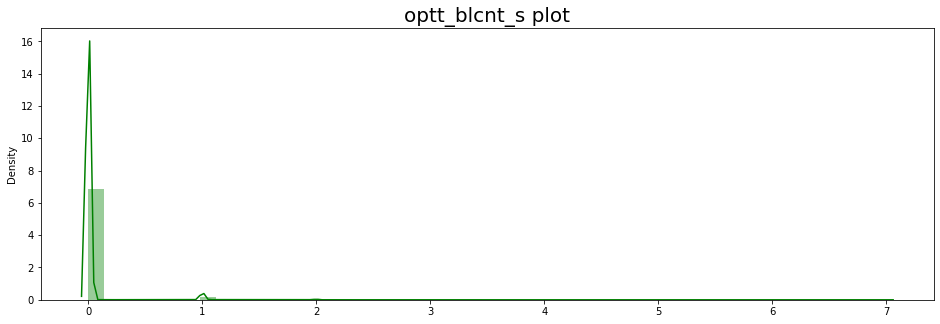

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


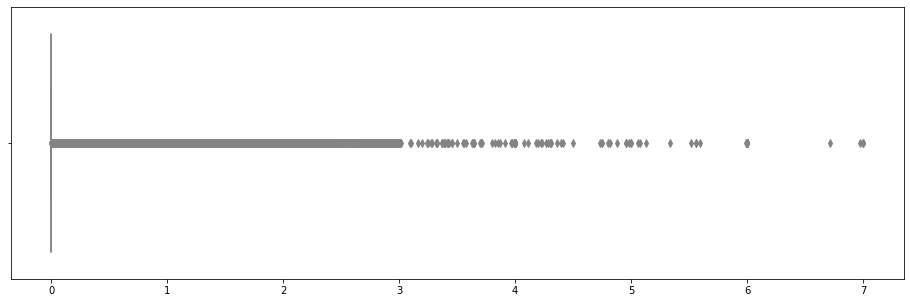

In [92]:
# optt_blcnt_s 통원횟수 안봐도 0 많음

con_ins_plot(df, 'optt_blcnt_s')
con_ins_boxplot(df, 'optt_blcnt_s')

# 그냥 0밖에 없어보이지 않나?

In [93]:
df['optt_blcnt_s'].describe()  

# 이거보면 걍 0임 0이랑 0이상이랑 나누면 뭐 달라지려나.. 

count    377928.000000
mean          0.048891
std           0.258888
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: optt_blcnt_s, dtype: float64

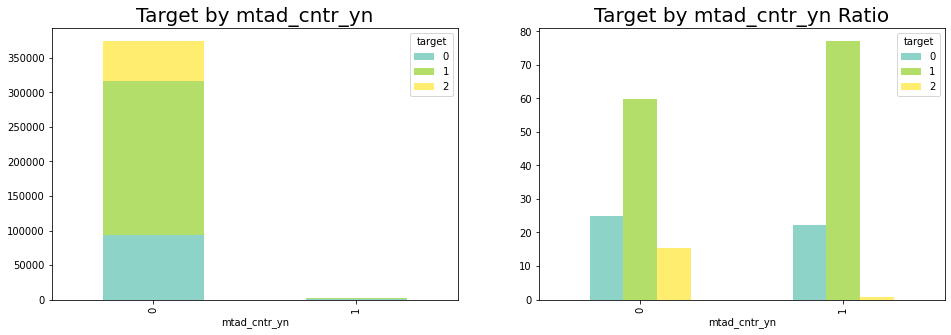

In [95]:
# mtad_cntr_yn 중도부가계약여부 - 중간에 질병보장내용을 추가했는지 여부

bar_ins_stack(df, 'mtad_cntr_yn') 

삭제 고려 1순위

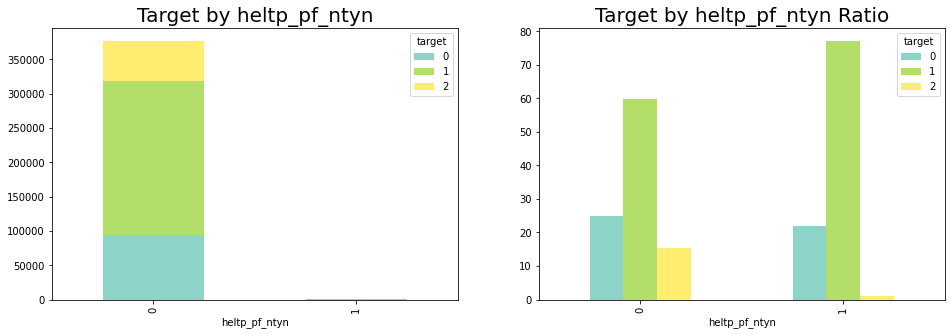

In [97]:
# heltp_pf_ntyn 건강인우대계약여부

bar_ins_stack(df, 'heltp_pf_ntyn') 

삭제 고려 1순위

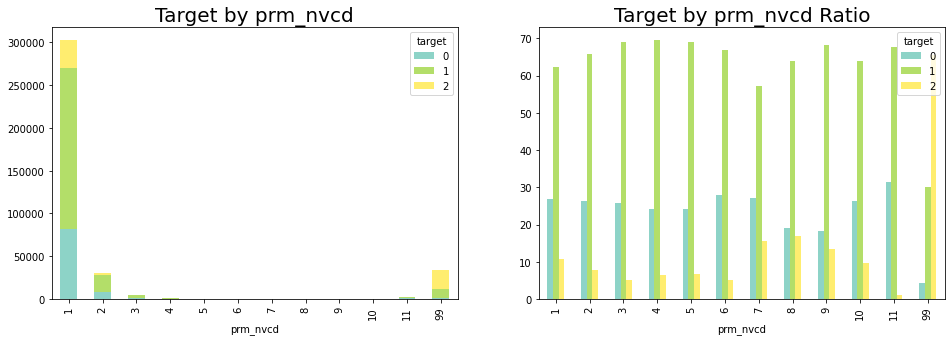

In [99]:
# prm_nvcd 보험료구간코드

bar_ins_stack(df, 'prm_nvcd') 

보험료구간코드랑 납입 보험료 구간이랑 뭔차이지..?

하나가 unknown이면 다른 것도 똑같나..? 이건 엑셀로 확인 해봐도 될듯

그리고 이것도 마찬가지로 99일 때 2 비율이 압도적으로 높음

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


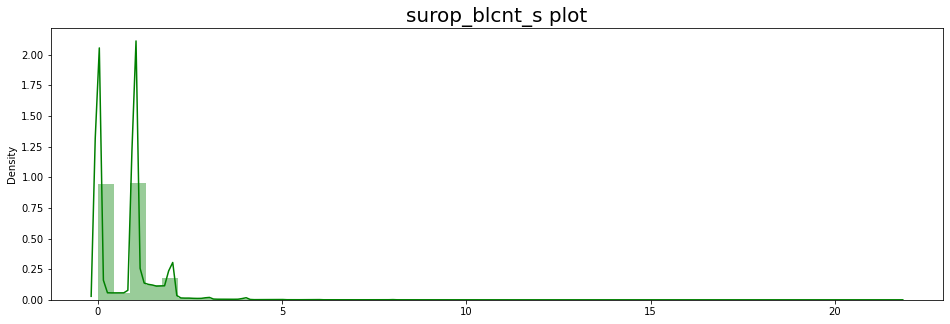

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


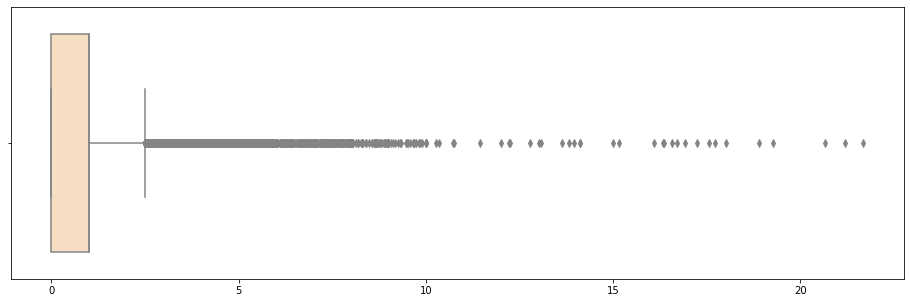

In [101]:
# surop_blcnt_s 수술 청구 건수

con_ins_plot(df, 'surop_blcnt_s')
con_ins_boxplot(df, 'surop_blcnt_s')

ㅋㅋㅋㅋㅋㅋ 뭘까.. 뭘까..

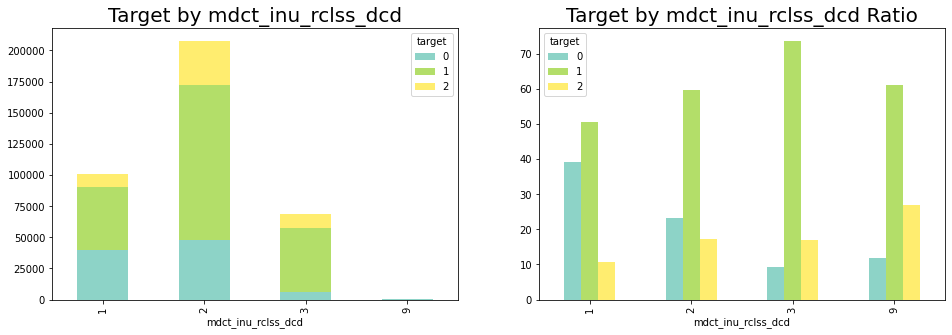

In [103]:
# mdct_inu_rclss_dcd 의료 기관 구분 코드

bar_ins_stack(df, 'mdct_inu_rclss_dcd') 



일반병원일 때 자동지급이 많은데.. 이건 돈 청구 금액이 낮아서 그런게 아닐까..

상급종합병원이 자동지급이 없는 이유도 이어지는 듯.

실비보험 2~5 이런 저금액 보험청구라서.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


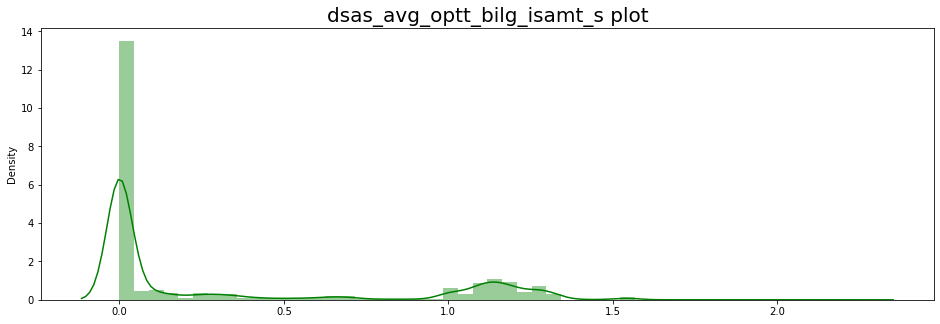

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


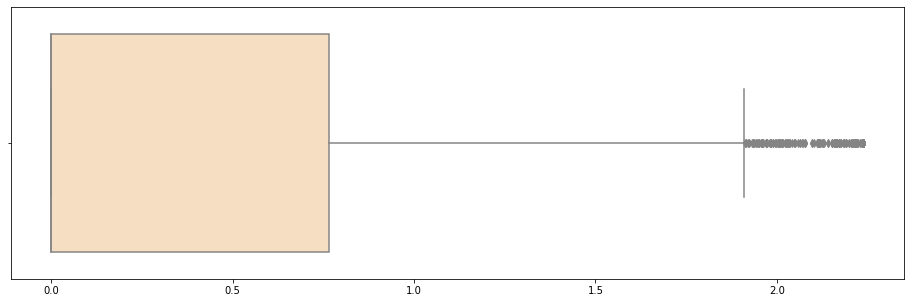

In [105]:
# dsas_avg_optt_bilg_isamt_s 질병별 평균 통원 청구 보험금

con_ins_plot(df, 'dsas_avg_optt_bilg_isamt_s')
con_ins_boxplot(df, 'dsas_avg_optt_bilg_isamt_s')

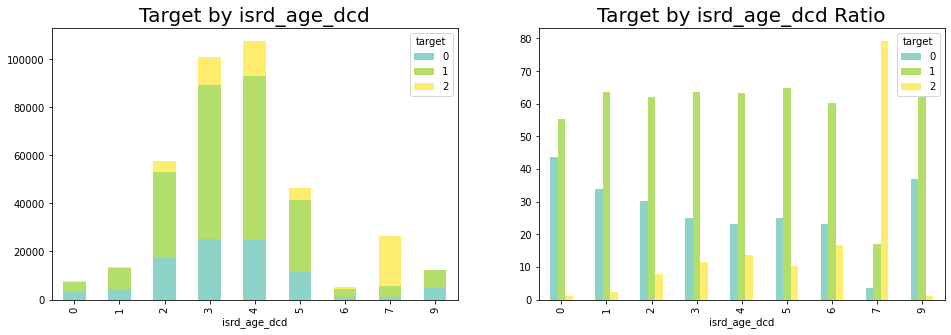

In [108]:
# isrd_age_dcd 고객의 연령구분코드

bar_ins_stack(df, 'isrd_age_dcd')

7이 뭐냐.... 엄청나게 중요한변순데 설명이 없네.

9는 Null값인듯

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


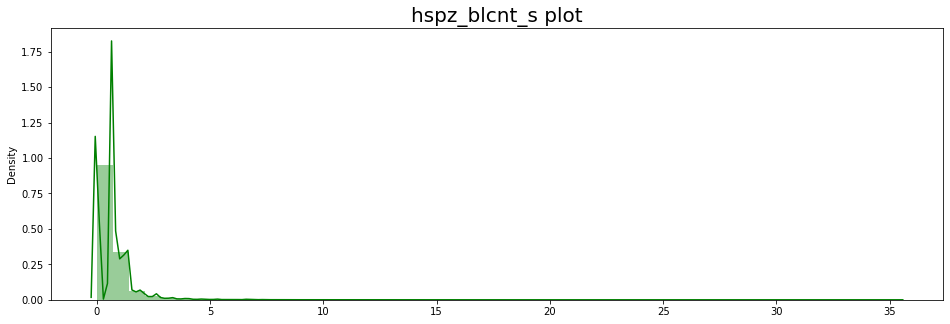

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


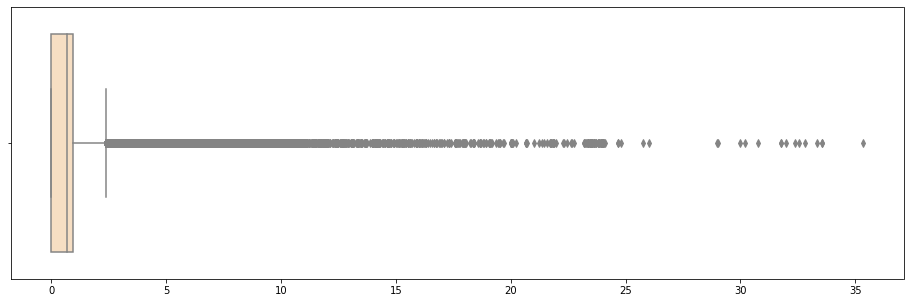

In [110]:
# hspz_blcnt_s 입원청구건수

con_ins_plot(df, 'hspz_blcnt_s')
con_ins_boxplot(df, 'hspz_blcnt_s')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


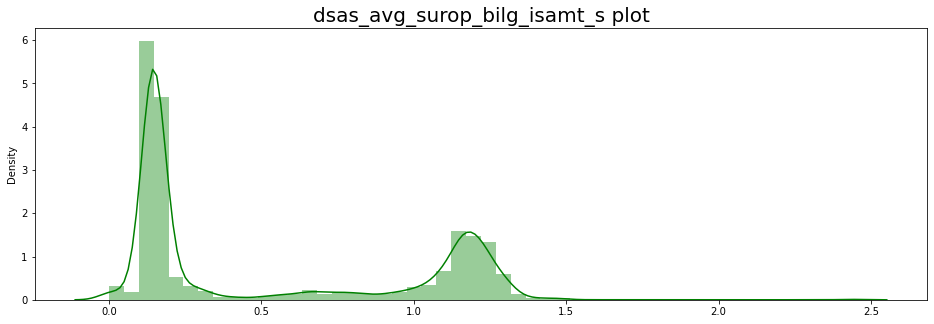

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

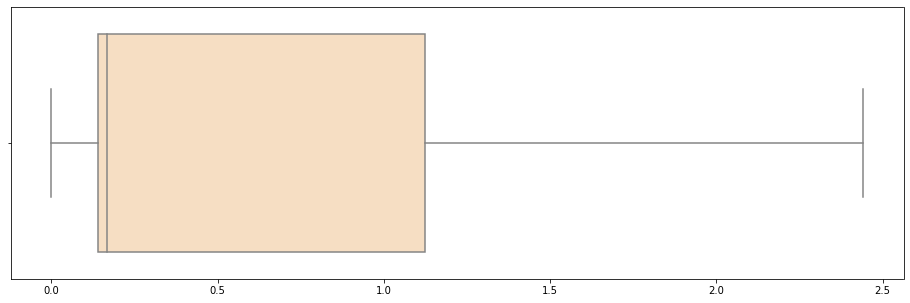

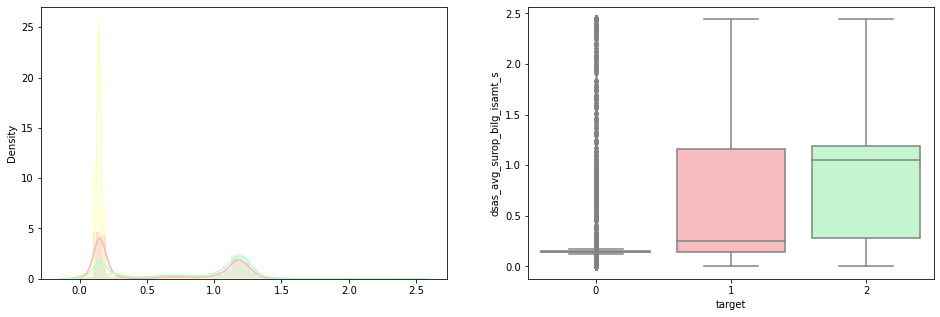

In [113]:
# dsas_avg_surop_bilg_isamt_s 질병별 평균 수술 청구 보험금
con_ins_plot(df, 'dsas_avg_surop_bilg_isamt_s')
con_ins_boxplot(df, 'dsas_avg_surop_bilg_isamt_s')
continuous_TF_plot(df, 'dsas_avg_surop_bilg_isamt_s')

연속형 변수들을 다 봤을 때 0인 경우와 그 이상인 경우 블록이 두개로 형성 되어 있어서 뭘 기준으로 나눠서 모델링이 좋을 거같은데 그게 뭔지는 나도 잘 모르겠음.


중요한 변수 인 것 같은게 

1. 자동 지급 - 0에 가깝고
2. 심사 - 평균이 0에 가깝고
3. 조사 - 평균이 1임

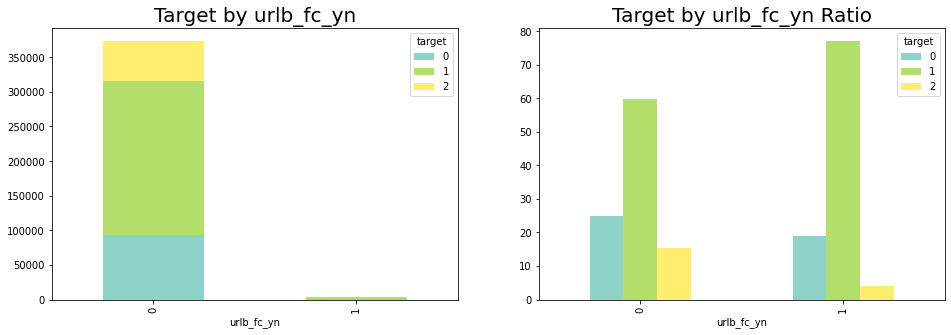

In [115]:
# urlb_fc_yn 부실판매자계약여부

bar_ins_stack(df, 'urlb_fc_yn')

삭제 고려 1순위

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


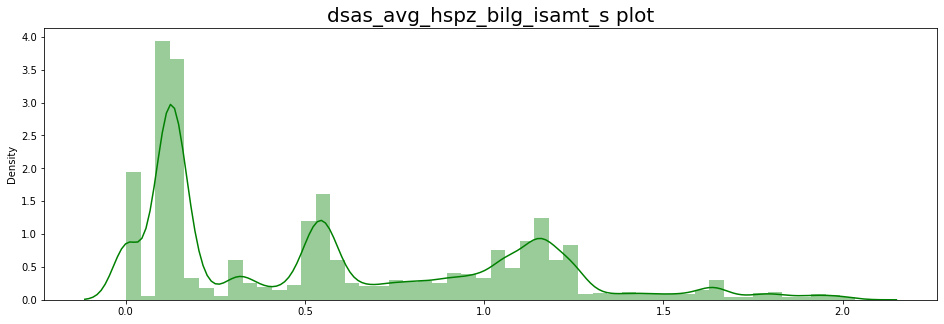

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

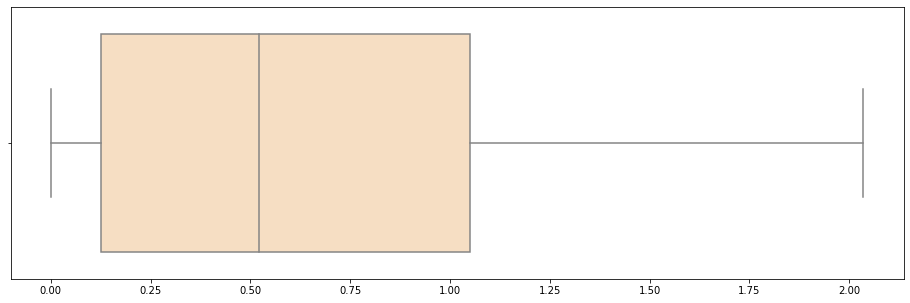

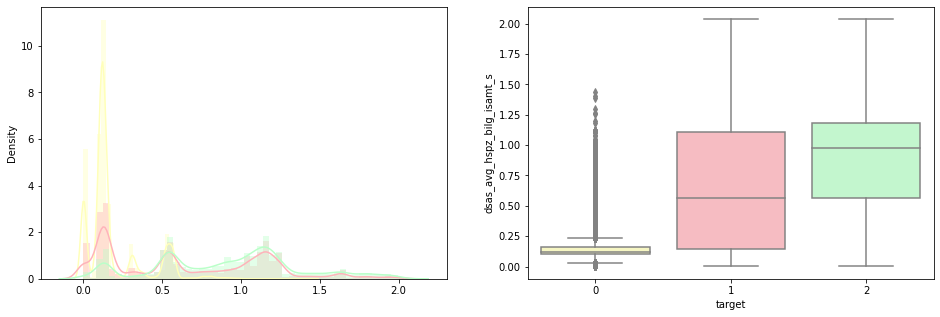

In [118]:
# dsas_avg_hspz_bilg_isamt_s 질병별 평균 입원 청구 보험금

con_ins_plot(df, 'dsas_avg_hspz_bilg_isamt_s')
con_ins_boxplot(df, 'dsas_avg_hspz_bilg_isamt_s')
continuous_TF_plot(df, 'dsas_avg_hspz_bilg_isamt_s')

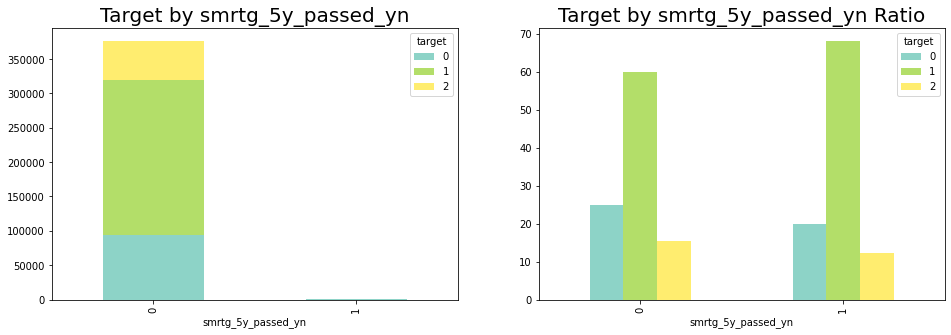

In [121]:
# smrtg_5y_passed_yn 부담도 5년 경과여부

bar_ins_stack(df, 'smrtg_5y_passed_yn')

삭제 고려 해야되는데 왜 관련변수를 상세히 적어놨을까..

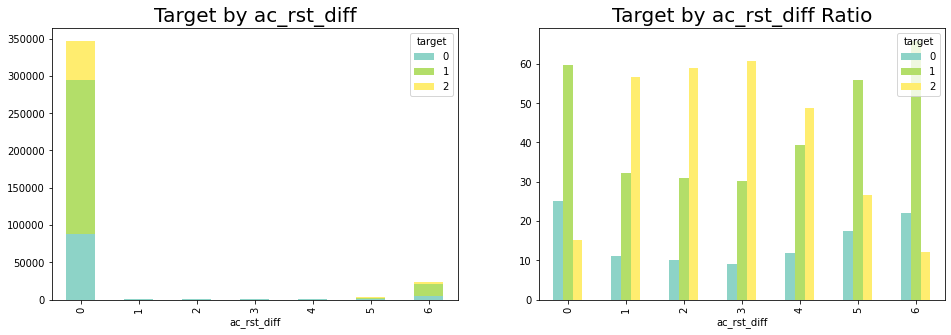

In [124]:
# ac_rst_diff 청구일자부터 계약 부활일까지의 기간 구분

bar_ins_stack(df,'ac_rst_diff' )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


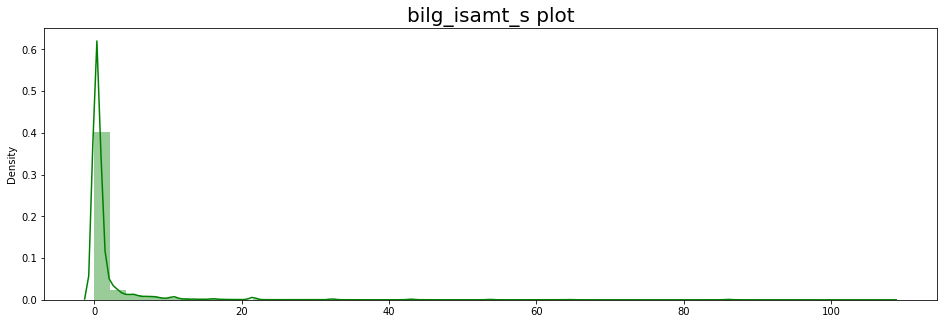

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


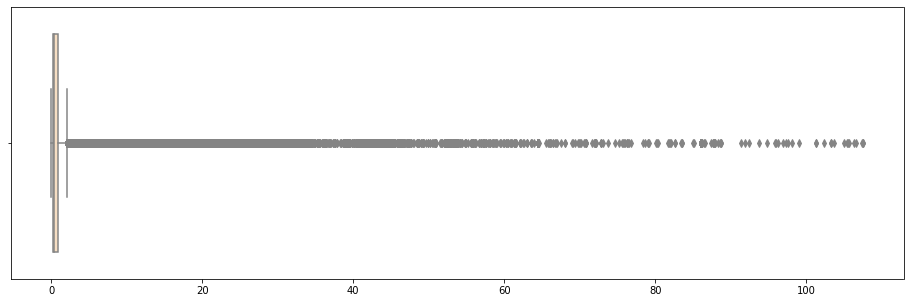

In [125]:
# bilg_isamt_s 청구 보험금

con_ins_plot(df, 'bilg_isamt_s')
con_ins_boxplot(df, 'bilg_isamt_s')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


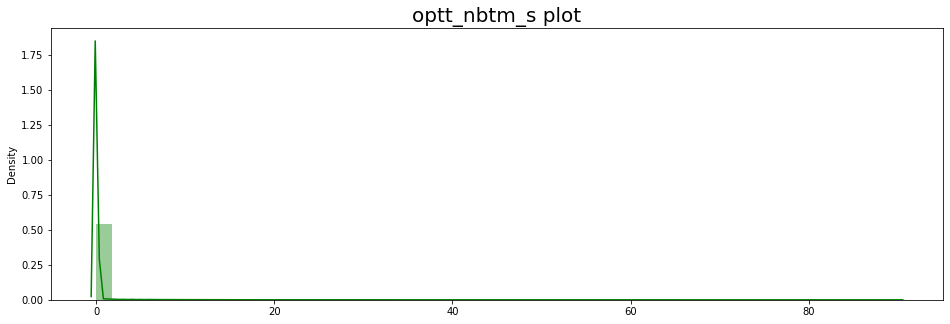

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


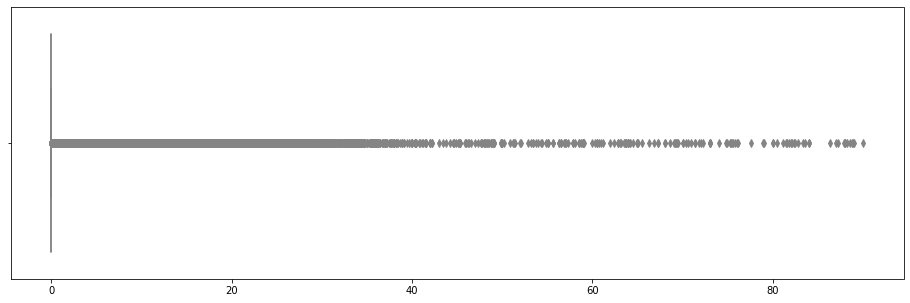

In [127]:
# optt_nbtm_s 통원 청구 건수

con_ins_plot(df, 'optt_nbtm_s')
con_ins_boxplot(df, 'optt_nbtm_s')
